In [40]:
import pandas as pd
import numpy as np
import pandas.api.types as ptypes
import sklearn.decomposition
import random
import matplotlib.pyplot as plt
from itertools import combinations 
from pathlib import Path
import pickle
import os
import shutil

In [41]:
Country = "Poland"
Country_abbr = "Pol" # Pol, Hun
text_name = "1393933249"+".txt"

dict_weight = dict()

file_path = "./Output/" + Country_abbr +"/corr/"

with open(file_path+text_name, "r") as f:
    is_Weight = False
    line = f.readline()
    while len(line.strip()):
        if line.strip().startswith("_") or line.strip().startswith("-"):
            line = f.readline()
            continue
        if is_Weight:
            
            name, weight = line.strip().split(":")
            name = name.strip()
            weight = weight.strip()
            weight = float(weight)
            dict_weight[name] = weight
        else:
            if line.startswith("Weight"):
                is_Weight = True
        line = f.readline()




In [42]:

df = pd.read_csv("../data/" + Country + '_DataFrame.csv')
df = df[["Date",*dict_weight.keys()]].dropna().reset_index(drop = True)
df = df.sort_values(by= ["Date"], ascending=False, ignore_index=True)

''' Select data frame that ends at 2020-03 '''
end_index = None
for index in range(len(df)):
    if df.iloc[index, 0] == "2020-03":
        end_index = index
        break
assert (end_index is not None)


''' Scale the data '''
def scale_series(series, mean, std):
    return (series - mean)/std
for col_num in range(1, len(df.columns)):
    df.iloc[:, col_num] = scale_series(df.iloc[:, col_num], df.iloc[end_index: , col_num ].mean(), df.iloc[end_index: , col_num ].std())








In [43]:
df

,Date,Risk_Premium,Stock_Prices_mom24mma%_change,Current_Account_Balance_over_GDP,Velocity_of_Money_mo12m%_change
0,2023-06,-0.435815,0.131862,2.317112,2.247155
1,2023-05,-0.858335,-0.271545,2.665445,2.887953
2,2023-04,-0.895075,-0.212825,2.686824,3.545652
3,2023-03,-1.042039,-0.549613,2.343298,4.076134
4,2023-02,-0.959372,-0.416649,1.754357,4.135029
...,...,...,...,...,...
215,2005-07,0.795002,0.965746,-0.005819,-0.990898
216,2005-06,0.712335,0.667263,0.126147,-1.180944
217,2005-05,0.363298,0.456586,0.228246,-1.903036
218,2005-04,0.142853,0.378051,0.222130,-0.979819


In [44]:
df_PCA_decomp = df.iloc[end_index:, 1:]
''' PCA decomposition'''
pca_model = sklearn.decomposition.PCA(n_components = len(df_PCA_decomp.columns)) 
pca = pca_model.fit_transform(df_PCA_decomp)

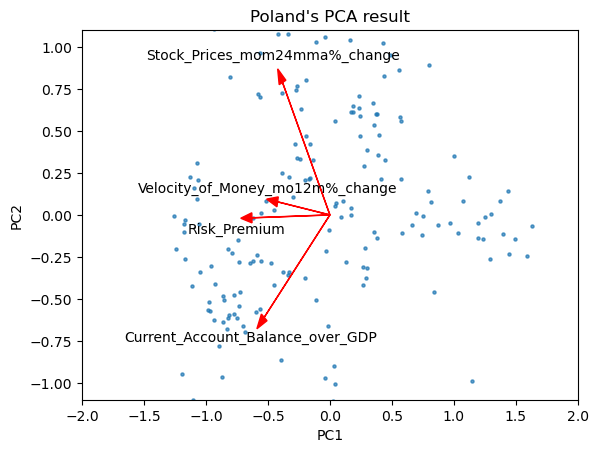

In [79]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())/4
    scaley = 1.0/(ys.max() - ys.min())/4
    plt.scatter(xs/1.6 ,ys/1.6 ,s=5, alpha = 0.7)
    plt.xlim(-2,2)
    plt.ylim(-1.1,1.1)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width = 0.06,color = 'r',alpha = 1, shape = "full")
        if labels is not None:
            if abs(coeff[i,1])< 0.05:
                plt.text(coeff[i,0]* 1.2, coeff[i,1] * 5, labels[i], color = 'black', ha = 'center', va = 'center')
            elif abs(coeff[i,1])< 0.2:
                plt.text(coeff[i,0]* 1.2, coeff[i,1] * 2, labels[i], color = 'black', ha = 'center', va = 'center')
            else:
                plt.text(coeff[i,0]* 1.2, coeff[i,1] * 1.2, labels[i], color = 'black', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    # plt.grid()
plt.title("Poland's PCA result")
myplot(pca[:,0:2],np.transpose(pca_model.components_[0:2, :]),list(df_PCA_decomp.columns))
plt.show()